<a href="https://colab.research.google.com/github/Qteit/Car-Insurance-Data-Project-/blob/main/Car_Insurance_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Core 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [ ]:
path='/content/drive/MyDrive/Car_Insurance_Claim.csv'

df=pd.read_csv(path)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

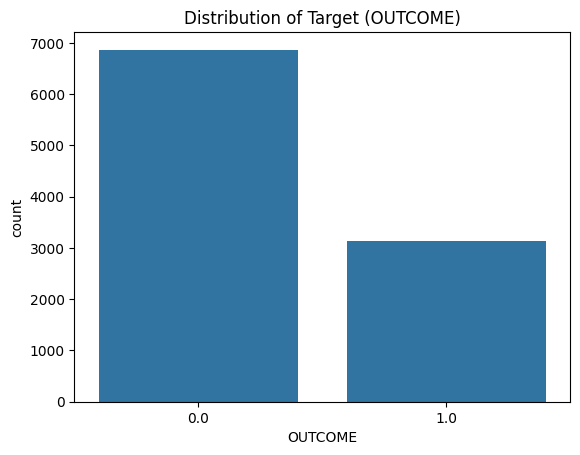

In [ ]:
# cheak the balance of value counts target
sns.countplot(x='OUTCOME', data=df)
plt.title('Distribution of Target (OUTCOME)')
plt.show()

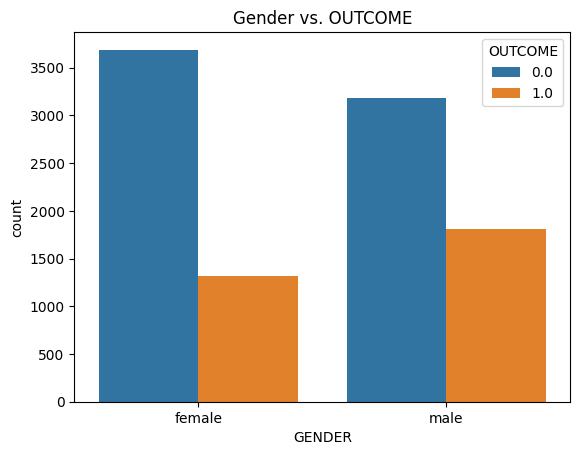

In [ ]:
sns.countplot(x='GENDER', hue='OUTCOME', data=df)
plt.title('Gender vs. OUTCOME')
plt.show()

In [ ]:
corr = df.corr(numeric_only = True)
corr.round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.00,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,0.01,0.00,-0.01
CREDIT_SCORE,0.00,1.00,0.31,0.28,0.22,0.01,-0.17,0.20,0.13,0.18,-0.33
VEHICLE_OWNERSHIP,0.01,0.31,1.00,0.18,0.13,-0.00,-0.10,0.13,0.09,0.12,-0.38
MARRIED,0.01,0.28,0.18,1.00,0.29,0.01,-0.46,0.22,0.12,0.22,-0.26
CHILDREN,0.00,0.22,0.13,0.29,1.00,0.02,-0.45,0.22,0.12,0.21,-0.23
POSTAL_CODE,0.01,0.01,-0.00,0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
ANNUAL_MILEAGE,-0.00,-0.17,-0.10,-0.46,-0.45,-0.13,1.00,-0.32,-0.12,-0.20,0.19
SPEEDING_VIOLATIONS,0.01,0.20,0.13,0.22,0.22,0.11,-0.32,1.00,0.36,0.44,-0.29
DUIS,0.01,0.13,0.09,0.12,0.12,0.04,-0.12,0.36,1.00,0.26,-0.19
PAST_ACCIDENTS,0.00,0.18,0.12,0.22,0.21,-0.12,-0.20,0.44,0.26,1.00,-0.31


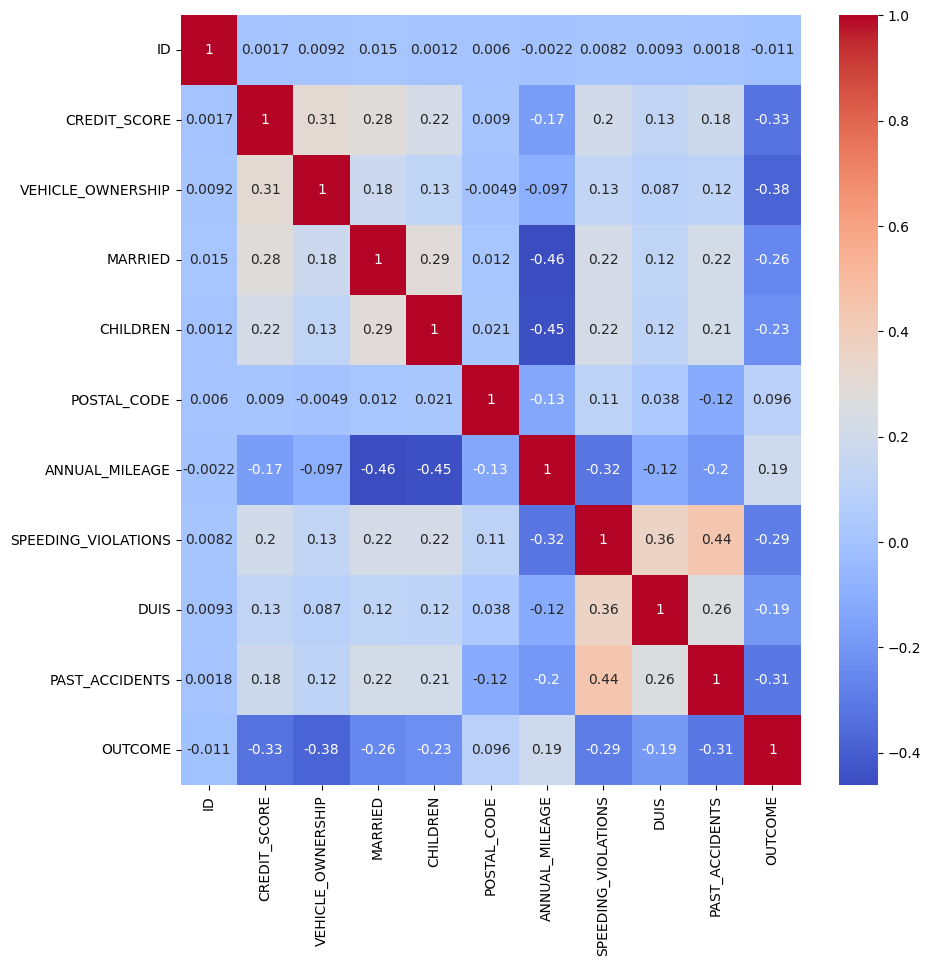

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

In [ ]:
df['OUTCOME'].value_counts(normalize=True)

,proportion
OUTCOME,
0.0,0.6867
1.0,0.3133


In [ ]:
df['CREDIT_SCORE'].describe()

,CREDIT_SCORE
count,9018.000000
mean,0.515813
std,0.137688
min,0.053358
25%,0.417191
50%,0.525033
75%,0.618312
max,0.960819


In [ ]:
df['ANNUAL_MILEAGE'].describe()

,ANNUAL_MILEAGE
count,9043.000000
mean,11697.003207
std,2818.434528
min,2000.000000
25%,10000.000000
50%,12000.000000
75%,14000.000000
max,22000.000000


In [ ]:
drop_col= ['ID']
y=df['OUTCOME']
x=df.drop(columns=['OUTCOME', * drop_col])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
x_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0
4375,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0
6698,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3
9805,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0
1101,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0


In [ ]:
num_cols=x_train.select_dtypes(include=['number']).columns


In [ ]:
impute_median=SimpleImputer(strategy='median')
impute_median.fit(x_train[num_cols])
x_train_num_imputed = impute_median.transform(x_train[num_cols])
x_train_num_imputed

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,0.694461,1.0,1.0,1.0,92101.0,12000.0,0.0,0.0,0.0
4375,0.295794,1.0,0.0,0.0,32765.0,12000.0,0.0,0.0,0.0
6698,0.525059,1.0,1.0,1.0,10238.0,12000.0,0.0,0.0,3.0
9805,0.454836,1.0,0.0,0.0,10238.0,20000.0,2.0,0.0,0.0
1101,0.152972,1.0,1.0,0.0,10238.0,10000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5734,0.693325,1.0,1.0,1.0,10238.0,14000.0,3.0,1.0,3.0
5191,0.521957,1.0,0.0,0.0,10238.0,11000.0,0.0,0.0,0.0
5390,0.626010,1.0,1.0,1.0,10238.0,12000.0,0.0,0.0,2.0
860,0.740884,1.0,1.0,1.0,10238.0,8000.0,1.0,0.0,5.0


In [ ]:
x_test_num_imputed = impute_median.transform(x_test[num_cols])
x_test_num_imputed.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
6252,0.541596,0.0,1.0,1.0,32765.0,11000.0,1.0,0.0,0.0
4684,0.553462,1.0,1.0,0.0,10238.0,8000.0,3.0,1.0,4.0
1731,0.245740,0.0,0.0,0.0,32765.0,13000.0,0.0,0.0,0.0
4742,0.525059,1.0,0.0,0.0,10238.0,14000.0,0.0,0.0,0.0
4521,0.689458,1.0,1.0,1.0,10238.0,10000.0,2.0,0.0,0.0


# preprocessing data

In [ ]:
print('numeric columns ',num_cols)
impute_na=SimpleImputer()
scaler=StandardScaler()
num_pipe=make_pipeline(impute_na,scaler)
num_tuple=('numeric',num_pipe,num_cols)
num_tuple

numeric columns  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [ ]:
cat_cols=x_train.select_dtypes(include=['object']).columns

for col in cat_cols:
  print('value count of ',[col])
  print(x_train[col].value_counts())
  print('\n')

value count of  ['AGE']
AGE
26-39    2286
40-64    2189
16-25    1517
65+      1508
Name: count, dtype: int64


value count of  ['GENDER']
GENDER
male      3754
female    3746
Name: count, dtype: int64


value count of  ['RACE']
RACE
majority    6767
minority     733
Name: count, dtype: int64


value count of  ['DRIVING_EXPERIENCE']
DRIVING_EXPERIENCE
0-9y      2658
10-19y    2449
20-29y    1585
30y+       808
Name: count, dtype: int64


value count of  ['EDUCATION']
EDUCATION
high school    3082
university     2982
none           1436
Name: count, dtype: int64


value count of  ['INCOME']
INCOME
upper class      3248
middle class     1629
poverty          1349
working class    1274
Name: count, dtype: int64


value count of  ['VEHICLE_YEAR']
VEHICLE_YEAR
before 2015    5262
after 2015     2238
Name: count, dtype: int64


value count of  ['VEHICLE_TYPE']
VEHICLE_TYPE
sedan         7151
sports car     349
Name: count, dtype: int64




In [ ]:
ord_cols =['AGE','EDUCATION','DRIVING_EXPERIENCE','INCOME','VEHICLE_YEAR']
print("Ordinal Columns:", ord_cols)
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
qual_cond_order_age = ['NA','16-25','26-39','40-64','65+']
qual_cond_order_education = ['NA','none','high school','university']
qual_cond_order_driving_exp = ['NA','0-9y','10-19y','20-29y','30y+']
qual_cond_order_income = ['NA','poverty','working class','middle class','upper class']
qual_cond_order_vehicle_year = ['NA','before 2015','after 2015']
ordinal_category_orders =[qual_cond_order_age,qual_cond_order_education,qual_cond_order_driving_exp,qual_cond_order_income,qual_cond_order_vehicle_year]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders, handle_unknown='use_encoded_value', unknown_value=-1)
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['AGE', 'EDUCATION', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR']


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', '16-25', '26-39', '40-64',
                                              '65+'],
                                             ['NA', 'none', 'high school',
                                              'university'],
                                             ['NA', '0-9y', '10-19y', '20-29y',
                                              '30y+'],
                                             ['NA', 'poverty', 'working class',
                                              'middle class', 'upper class'],
                                             ['NA', 'before 2015',
                                              'after 2015']],
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1)),
                 ('standardscale

In [ ]:
ohe_cols = x_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
impute_na_ohe = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_na_ohe, ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object')


('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))

In [ ]:
preprocessor = ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fil...
                                                  StandardScaler())]),
                                 ['AGE', 'EDUCATION', 'DRIVING_EXPERIENCE',
                                  'INCOME', 'VEHICLE_YEAR']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fil...
                                                  StandardScaler())]),
                                 ['AGE', 'EDUCATION', 'DRIVING_EXPERIENCE',
                                  'INCOME', 'VEHICLE_YEAR']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pipeline and fitting the random forest
rf_tree=RandomForestClassifier()
rf_tree_pipe=make_pipeline(preprocessor,rf_tree)
rf_tree_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(step...
                                                   'INCOME', 'VEHICLE_YEAR']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier', RandomForestClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



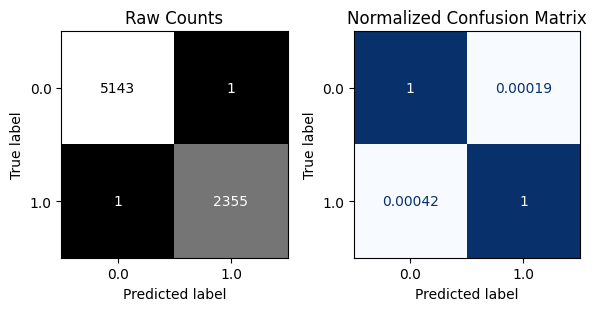


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1723
         1.0       0.76      0.68      0.72       777

    accuracy                           0.83      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



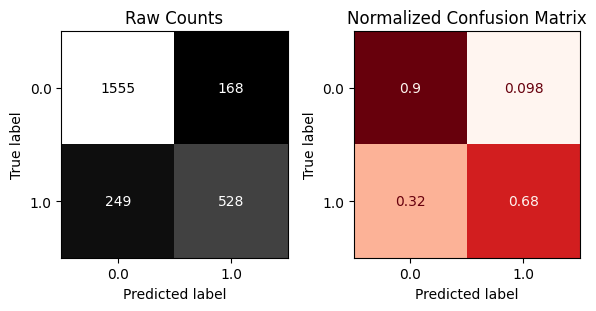

In [ ]:
evaluate_classification(rf_tree_pipe, x_train, y_train, x_test,y_test)

In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'AGE', 'EDUCATION', 'DRIVING_EXPERIENCE',
       'INCOME', 'VEHICLE_YEAR', 'GENDER_female', 'GENDER_male',
       'RACE_majority', 'RACE_minority', 'VEHICLE_TYPE_sedan',
       'VEHICLE_TYPE_sports car'], dtype=object)

In [ ]:
X_train_df = pd.DataFrame(preprocessor.transform(x_train),
                           columns = feature_names, index = x_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(x_test),
                           columns = feature_names, index = x_test.index)
X_test_df.head(3)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE,EDUCATION,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
6252,0.197495,-1.515010,1.000533,0.674880,0.694321,-0.266742,-0.215146,-0.432581,-0.643278,-0.478382,-0.278819,-0.072712,0.084243,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0
4684,0.288918,0.660062,1.000533,-1.481745,-0.510486,-1.392694,0.673153,1.348077,1.744243,1.467314,-0.278819,0.931603,0.956921,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0
1731,-2.081841,-1.515010,-0.999467,-1.481745,0.694321,0.483892,-0.659296,-0.432581,-0.643278,-1.451230,-1.631436,-1.077028,-1.661114,-0.652161,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
feature_importances = pd.Series(rf_tree.feature_importances_, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

,0
CREDIT_SCORE,0.163943
DRIVING_EXPERIENCE,0.115515
ANNUAL_MILEAGE,0.103856
AGE,0.091457
VEHICLE_OWNERSHIP,0.082668
PAST_ACCIDENTS,0.060100
INCOME,0.058670
SPEEDING_VIOLATIONS,0.058329
POSTAL_CODE,0.054850
VEHICLE_YEAR,0.052989


In [ ]:
feature_importances.sum()

0.9999999999999999

## Do these features make sense based on the business case?
depends on target (Insurance claim) yes , it's make sense

# Create Explanatory Visualizations for the most important features.


1. CREDIT_SCORE / numaric feature

<ipython-input-30-0201ab5b8c1d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_outcome_credit = df.groupby(credit_score_groups)['OUTCOME'].mean()


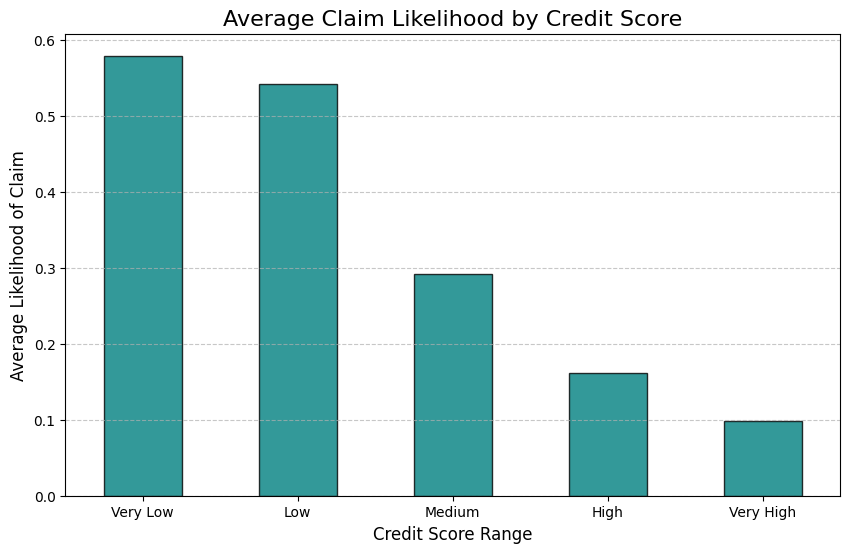

In [ ]:
plt.figure(figsize=(10, 6))
credit_score_groups = pd.cut(df['CREDIT_SCORE'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
average_outcome_credit = df.groupby(credit_score_groups)['OUTCOME'].mean()
average_outcome_credit.plot(kind='bar', color='teal', alpha=0.8, edgecolor='black')
plt.title('Average Claim Likelihood by Credit Score', fontsize=16)
plt.xlabel('Credit Score Range', fontsize=12)
plt.ylabel('Average Likelihood of Claim', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This is a negative relationship between the credit score and the outcome (target). As the value of the credit score increases, the target decreases. This means that when a customer has a high credit score, the likelihood of claims is reduced.

2.DRIVING_EXPERIENCE/ categorical feature

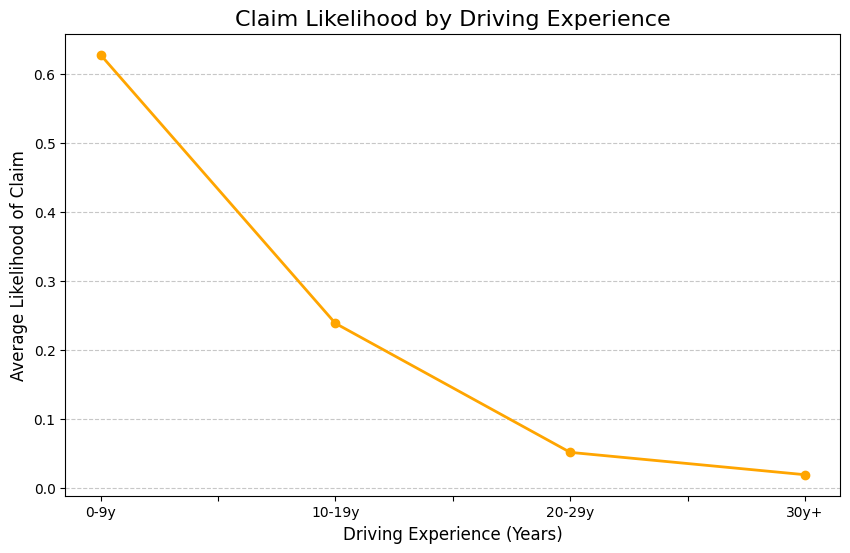

In [ ]:
plt.figure(figsize=(10, 6))
average_outcome_experience = df.groupby('DRIVING_EXPERIENCE')['OUTCOME'].mean()
average_outcome_experience.plot(kind='line', marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Claim Likelihood by Driving Experience', fontsize=16)
plt.xlabel('Driving Experience (Years)', fontsize=12)
plt.ylabel('Average Likelihood of Claim', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This is a negative relationship between the credit score and the outcome (target). As the value of driving experience (years) the likelihood of claims is reduced

#  core 2

## PCA

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

In [ ]:
x_train_preprocessed.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE,EDUCATION,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,1.375201,0.660062,1.000533,0.674880,3.867776,6.826978e-16,-0.659296,-0.432581,-0.643278,0.494466,-0.278819,-1.077028,0.956921,-0.652161,0.0,1.0,1.0,0.0,1.0,0.0
4375,-1.696215,0.660062,-0.999467,-1.481745,0.694321,1.085747e-01,-0.659296,-0.432581,-0.643278,-1.451230,-1.631436,-1.077028,-1.661114,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0
6698,0.000000,0.660062,1.000533,0.674880,-0.510486,6.826978e-16,-0.659296,-0.432581,1.147363,0.494466,1.073798,-0.072712,0.956921,-0.652161,0.0,1.0,1.0,0.0,1.0,0.0
9805,-0.470918,0.660062,-0.999467,-1.481745,-0.510486,3.111111e+00,0.229004,-0.432581,-0.643278,-0.478382,1.073798,-0.072712,-0.788436,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0
1101,-2.796544,0.660062,1.000533,-1.481745,-0.510486,-6.420595e-01,-0.659296,-0.432581,-0.643278,-1.451230,-1.631436,-1.077028,-1.661114,-0.652161,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(x_train_preprocessed)
X_test_pca = pca.transform(x_test_preprocessed)

In [ ]:
# this step to cheack the variance of each feature
print(pd.DataFrame(x_train_preprocessed).var())


CREDIT_SCORE               1.000133
VEHICLE_OWNERSHIP          1.000133
MARRIED                    1.000133
CHILDREN                   1.000133
POSTAL_CODE                1.000133
ANNUAL_MILEAGE             1.000133
SPEEDING_VIOLATIONS        1.000133
DUIS                       1.000133
PAST_ACCIDENTS             1.000133
AGE                        1.000133
EDUCATION                  1.000133
DRIVING_EXPERIENCE         1.000133
INCOME                     1.000133
VEHICLE_YEAR               1.000133
GENDER_female              0.250033
GENDER_male                0.250033
RACE_majority              0.088193
RACE_minority              0.088193
VEHICLE_TYPE_sedan         0.044374
VEHICLE_TYPE_sports car    0.044374
dtype: float64


In [ ]:
X_train_with_pca = pd.concat([pd.DataFrame(x_train_preprocessed), pd.DataFrame(X_train_pca, columns=['pca0', 'pca1', 'pca2'])], axis=1)
X_test_with_pca = pd.concat([pd.DataFrame(x_test_preprocessed), pd.DataFrame(X_test_pca, columns=['pca0', 'pca1', 'pca2'])], axis=1)

In [ ]:
X_train_with_pca.isna().sum()

,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
MARRIED,0
CHILDREN,0
POSTAL_CODE,0
ANNUAL_MILEAGE,0
SPEEDING_VIOLATIONS,0
DUIS,0
PAST_ACCIDENTS,0
AGE,0


## Modling with pca

In [ ]:
rf_tree.fit(X_train_with_pca, y_train)

RandomForestClassifier()

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



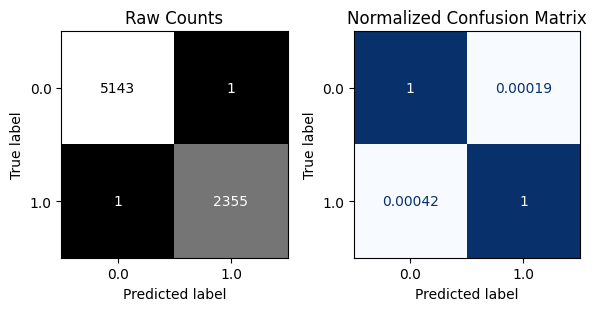


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1723
         1.0       0.76      0.69      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.80      2500
weighted avg       0.83      0.84      0.83      2500



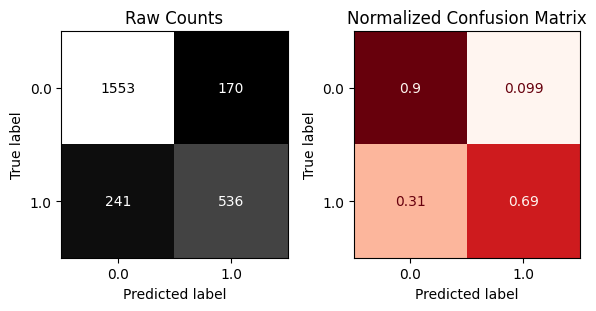

In [ ]:
evaluate_classification(rf_tree, X_train_with_pca, y_train, X_test_with_pca, y_test)

the values are almost equal but after apply pca on dataset the result become better than without pca. For instance (accuracy with pca = 84%) while (accuracy without pca = 83%) the difference is low for other testing componant ( f1 score ,macro avg and weighted avg) but still the result enhanced and become more better than dataset without pca

In [ ]:
feature_names_pca = X_train_with_pca.columns
feature_importances_pca = pd.Series(rf_tree.feature_importances_, index=feature_names_pca)
feature_importances_pca = feature_importances_pca.sort_values(ascending=True)
feature_importances_pca

,0
VEHICLE_TYPE_sedan,0.004645
VEHICLE_TYPE_sports car,0.004674
RACE_majority,0.005392
RACE_minority,0.005745
DUIS,0.008200
CHILDREN,0.011636
MARRIED,0.013842
GENDER_male,0.015060
GENDER_female,0.015361
EDUCATION,0.019252


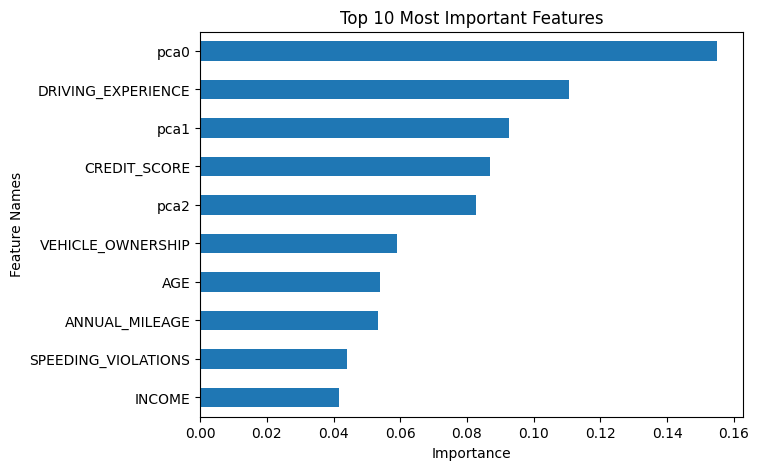

In [ ]:
ax = feature_importances_pca.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');

In [ ]:
feature_importances_pca.sum()

1.0000000000000002

## Filter Method - Correlation

In [ ]:
# WE must install the lib
!pip install collinearity

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4443 sha256=938eafa993584b91f6c8f2e704e60fb3edf5242827c48ff3682e88339e7ebb73
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [ ]:
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

In [ ]:
selector = SelectNonCollinear(correlation_threshold = 0.85, scoring = f_classif)


In [ ]:
selector.fit(x_train_preprocessed.values, y_train.values)

In [ ]:
non_collinear = selector.get_support()
non_collinear[:5]

[True, True, True, True, True]

In [ ]:
# Check how many features are below the theshold
non_collinear.count(True)

17

In [ ]:
# Check how many features are above the theshold
non_collinear.count(False)

3

In [ ]:
# Apply the mask to the training data
x_train_no_corr = x_train_preprocessed.loc[:, non_collinear]  # Use the mask to filter columns

# Apply the mask to the testing data
x_test_no_corr = x_test_preprocessed.loc[:, non_collinear]

In [ ]:
rf_tree.fit(x_train_no_corr, y_train)

RandomForestClassifier()

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



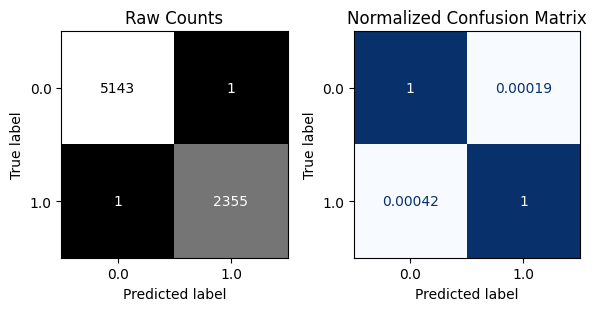


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1723
         1.0       0.75      0.69      0.72       777

    accuracy                           0.83      2500
   macro avg       0.81      0.80      0.80      2500
weighted avg       0.83      0.83      0.83      2500



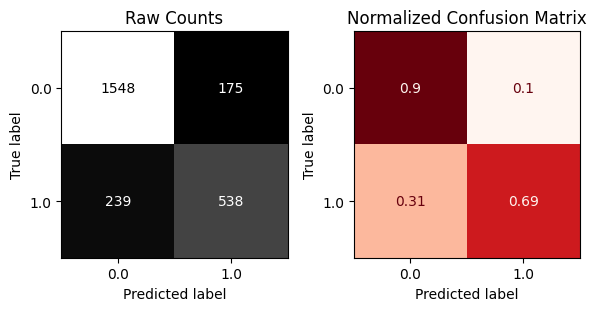

In [ ]:
evaluate_classification(rf_tree, x_train_no_corr, y_train, x_test_no_corr, y_test)

after using filter method the result enhanced just at accuracy testing than result without use any thing , so the best we to have a best result by using PCA

# Core 3

## Binary Classification Models in Keras

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [ ]:
x_train_neural = preprocessor.fit_transform(x_train)
x_test_neural = preprocessor.transform(x_test)

In [ ]:
input_shape = x_train_neural.shape[1]
input_shape

20

In [ ]:
def build_model():
  model = Sequential()

  model.add(Dense(10,
                  input_dim=input_shape,
                  activation='relu',
                  ))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='bce',
                metrics=['accuracy', metrics.Precision(), metrics.Recall()])
  return model

In [ ]:
clf_model=build_model()
clf_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)


In [ ]:
history = clf_model.fit(x_train_neural,y_train,
                        validation_split=0.2,
                        epochs=50,
                        verbose=0, callbacks = [early_stop]
                        )

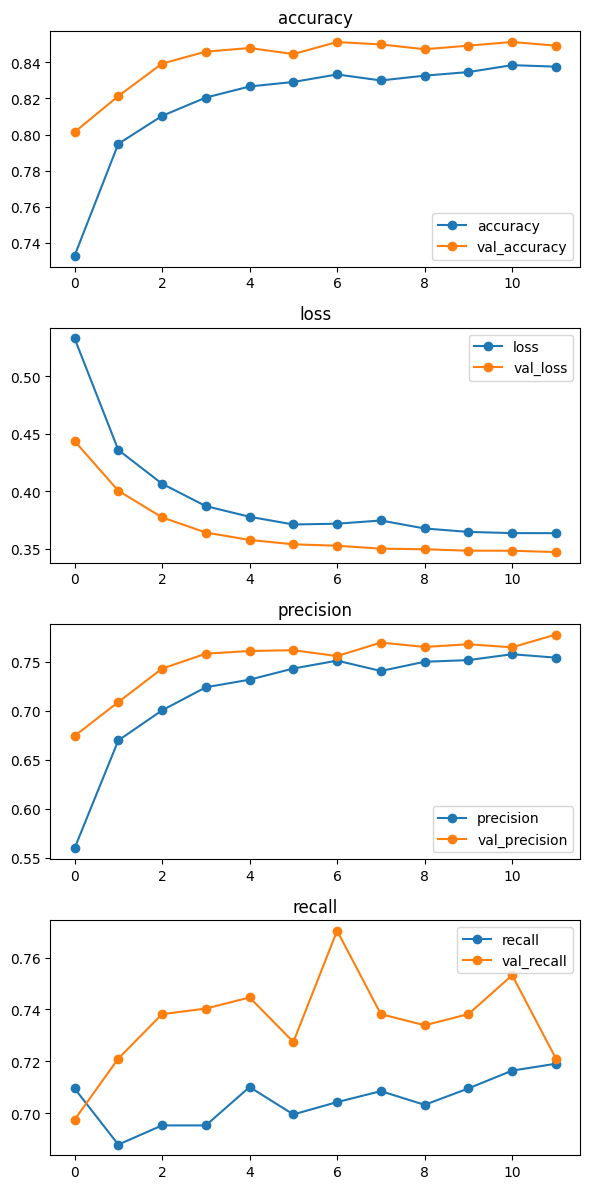

In [ ]:
plot_history(history);

## Evaluate the model

In [ ]:
# make predictions
y_pred_test = clf_model.predict(x_test_neural)
y_pred_test[:5]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.4937486 ],
       [0.00607078],
       [0.8517945 ],
       [0.7167327 ],
       [0.00342873]], dtype=float32)

In [ ]:
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      1723
         1.0       0.77      0.68      0.72       777

    accuracy                           0.84      2500
   macro avg       0.82      0.79      0.80      2500
weighted avg       0.83      0.84      0.84      2500



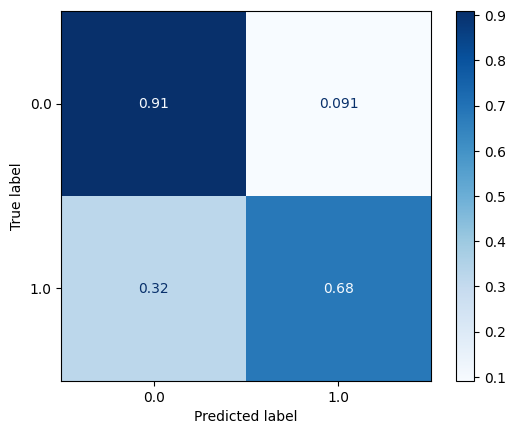

In [ ]:
from sklearn.metrics import classification_report ,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

## Tune at least 3 parameters with the Keras tuner

In [ ]:
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
print(f"Shape of x_test_neural: {x_test_neural.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_test_neural: (2500, 20)
Shape of y_test: (2500,)


In [ ]:
#from sklearn.model_selection import train_test_split
#X_val, X_test, y_val, h_test = train_test_split(
 #   x_test_neural, y_test, test_size=0.5, random_state=42)

In [ ]:
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(x_train_neural, y_train,  epochs=50,
             validation_data = (x_test_neural, y_test), callbacks = [early_stop])

Trial 90 Complete [00h 00m 09s]
val_accuracy: 0.8428000211715698

Best val_accuracy So Far: 0.847599983215332
Total elapsed time: 00h 11m 59s


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 35,
 'dropout_value': 0.30000000000000004,
 'optimizer': 'rmsprop',
 'tuner/epochs': 17,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             399 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,135 (4.43 KB)

 Trainable params: 1,135 (4.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = best_model.evaluate(x_test_neural, y_test, return_dict=True)
result

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8441 - loss: 0.3698 - precision: 0.7919 - recall: 0.7105


{'accuracy': 0.847599983215332,
 'loss': 0.36220788955688477,
 'precision': 0.7757660150527954,
 'recall': 0.7168596982955933}